In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as u
import add_shape_noise as sn
import cov_script as cs
import specs as  sp

In [2]:
# Get the rp bins:
up_gm_noSN_file = 'test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon'
ups_jk_noSN = np.loadtxt('../data_for_Danielle/'+up_gm_noSN_file)
ups_jk_noSN_only = ups_jk_noSN[:,4:]
rp = ups_jk_noSN[:,0]
print(rp)

[ 0.11591284  0.15280288  0.20143342  0.26554097  0.35005117  0.46145732  0.60831922  0.80192091  1.05713764  1.39357881  1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244
 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]


In [3]:
# Declare parameters
sims_Lbox = 1380 # Mpc/h
sims_vol = sims_Lbox**3 # (Mpc/h)^3
rp0 = 1.5

lens = 'DESI'
src = 'LSST'

# Let's use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

#As is selected to match the sigma8 value we are using alongside other parameters. 

params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'A_s':2.115 * 10**(-9), 'b':2.33, 'OmM': 0.292} 


In [4]:
rp_edg = u.rp_bin_edges_log(rp)

ind = next(j[0] for j in enumerate(rp_edg) if j[1]>rp0)
rp_cut = rp[ind:]
rp_edg_cut = rp_edg[ind:]
print(len(rp_cut))
print(ind)

15
10


In [5]:
# Get the shape noise covariance:

Cov_SN = sn.cov_SN_only(rp_edg_cut,'DESI', 'LSST', params, rp0)

# Extent it to the shape of the full covariance with zeros elsewhere:

Cov_SN_full = np.zeros((31,31))
for i in range(0,15):
    for j in range(0,15):
        Cov_SN_full[i,j] = Cov_SN[i,j]

print(Cov_SN_full)

nbar*V= 3050882.678623948
[[ 1.05519099e-01 -4.87785273e-06 -2.80691127e-06 -1.61520885e-06 -9.29455677e-07 -5.34845917e-07 -3.07771701e-07 -1.77104128e-07 -1.01912788e-07 -5.86446886e-08 -3.37464959e-08 -1.94190815e-08 -1.11745150e-08 -6.43026224e-09
  -3.70022970e-09  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.87785273e-06  6.07219749e-02 -1.61520885e-06 -9.29455677e-07 -5.34845917e-07 -3.07771701e-07 -1.77104128e-07 -1.01912788e-07 -5.86446886e-08 -3.37464959e-08 -1.94190815e-08 -1.11745150e-08 -6.43026224e-09 -3.70022970e-09
  -2.12925995e-09  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  

In [5]:
# Get the full covariance without shape noise

print('rp[0]=', rp[0])

#cov_corr_dict_noSN =cs.evaluate_correlation_matrix(stat_list=['gm', 'gg', 'beta'],rmin=rp0,plots=0,data_dir='../data_for_Danielle/',  add_shape_noise='False', lens=lens, src=src)
cov_corr_dict_noSN =cs.evaluate_correlation_matrix(stat_list=['gm', 'gg', 'beta'],rmin=rp0,plots=0,data_dir='../data_for_Danielle/',  add_shape_noise=True, lens=lens, src=src)

rp[0]= 0.11591283693
add shape noise= True
par= gm
add shapenoise = True
gmfile= ../data_for_Danielle/ups_gm_with_SN_DESI_LSST.dat
rp= [ 1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
ind min= 0
par= gg
rp= [ 0.11591284  0.15280288  0.20143342  0.26554097  0.35005117  0.46145732  0.60831922  0.80192091  1.05713764  1.39357881  1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244
 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
ind min= 10


In [6]:
mperMpc = 3.0856776*10**22
Msun = 1.989*10**30 # in kg
Gnewt = 6.67408*10**(-11) # kg^{-1}m^3 s^{-2}
c=2.99792458*10**(8) # m / s
rho_crit = 3. * 10**10 * mperMpc / (8. * np.pi * Gnewt * Msun) / 10**12  
# rho crit in Msol h^2 / Mpc / pc^2, to yield Upsilon_gg in Msol h / pc^2

OmegaM = 0.292

vol_LSST_DESI = sp.volume(params, src, lens)

volume_factor = sims_vol / vol_LSST_DESI



In [7]:
#cov_tot_added = rho_crit**2*volume_factor*OmegaM**2*(Cov_SN_full+cov_corr_dict_noSN['cov'])
cov_tot_added = rho_crit**2*volume_factor*OmegaM**2*(cov_corr_dict_noSN['cov'])

In [8]:
corr_tot_added = np.zeros((len(cov_tot_added[0,:]), len(cov_tot_added[0,:])))
for i in range(0,len(cov_tot_added[0,:])):
    for j in range(0,len(cov_tot_added[0,:])):
        corr_tot_added[i,j]=cov_tot_added[i,j]/(np.sqrt(cov_tot_added[i,i]*cov_tot_added[j,j]))

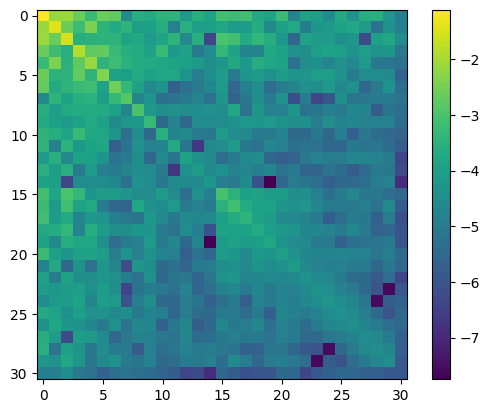

In [9]:
plt.figure()
plt.imshow(np.log10(np.abs(cov_tot_added)))
plt.colorbar()
plt.show()

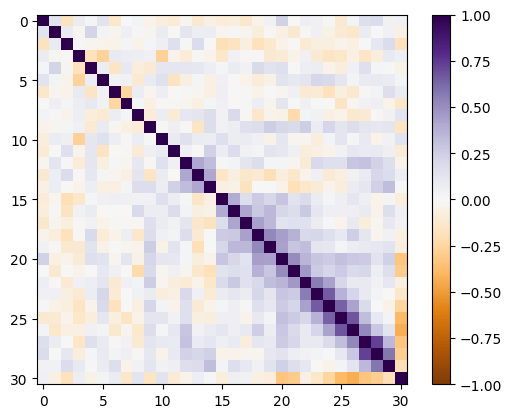

In [10]:
cmap=plt.get_cmap('PuOr')

plt.figure()
plt.imshow(corr_tot_added, vmin=-1, vmax=1, cmap=cmap)
plt.colorbar()
plt.savefig('../plots/corr_add_SN_samples.pdf')
plt.show()

In [31]:
cov_sampled_SN = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jun25_LSSTY1_fixShapeNoise.dat')[0:15,0:15]

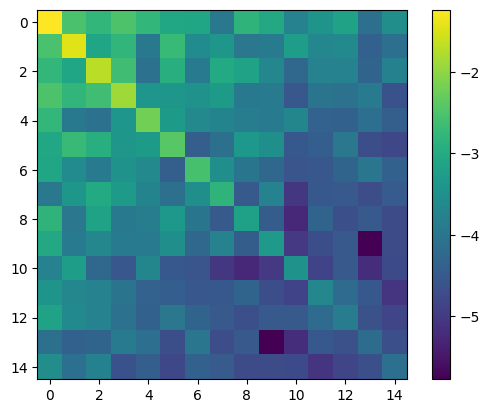

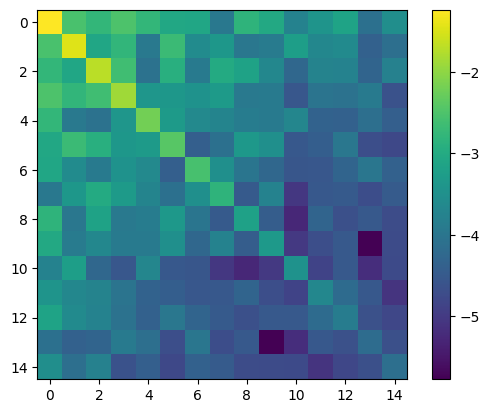

In [32]:
plt.figure()
plt.imshow(np.log10(np.abs(cov_tot_added)))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.log10(np.abs(cov_sampled_SN)))
plt.colorbar()
plt.show()

In [35]:
print(cov_tot_added)
np.savetxt('../txtfiles/cov_tot_add_SN_directed.dat', cov_tot_added)

[[ 5.80479029e-02  2.85735677e-03  1.73122526e-03  3.09252977e-03  1.69657643e-03 -8.89410426e-04  8.03240508e-04 -1.09789621e-04  1.51490966e-03  9.35081999e-04 -1.72808398e-04 -3.83584322e-04 -7.09293447e-04  8.14533504e-05
  -2.99993580e-04]
 [ 2.85735677e-03  3.54587051e-02 -8.10854486e-04  1.60966000e-03 -1.16522824e-04 -2.04275904e-03 -2.63391450e-04  4.22644143e-04  1.05767379e-04  1.30916733e-04  5.77954034e-04 -2.14336286e-04 -2.53007337e-04 -4.31337140e-05
   7.68306892e-05]
 [ 1.73122526e-03 -8.10854486e-04  1.95434757e-02  2.38950765e-03  8.63859010e-05 -1.21575152e-03 -1.27082858e-04 -9.83479543e-04 -6.92022747e-04  2.13309875e-04  5.53258142e-05  1.77084791e-04 -1.73874953e-04  4.90179770e-05
  -1.67991944e-04]
 [ 3.09252977e-03  1.60966000e-03  2.38950765e-03  1.29265494e-02  4.01887657e-04 -4.25412842e-04  3.45570373e-04 -5.04967707e-04  1.14050680e-04 -1.20294223e-04 -2.93060600e-05  9.27852681e-05 -8.79217621e-05  1.20647803e-04
  -2.35429487e-05]
 [ 1.69657643e-03 -1

In [34]:
print(cov_sampled_SN)

[[ 5.77495776e-02  2.85737056e-03  1.73123320e-03  3.09253433e-03  1.69657906e-03 -8.89408914e-04  8.03241378e-04 -1.09789120e-04  1.51490995e-03  9.35082165e-04 -1.72808303e-04 -3.83584267e-04 -7.09293415e-04  8.14533686e-05
  -2.99993569e-04]
 [ 2.85737056e-03  3.52870310e-02 -8.10849920e-04  1.60966263e-03 -1.16521312e-04 -2.04275817e-03 -2.63390949e-04  4.22644431e-04  1.05767545e-04  1.30916829e-04  5.77954089e-04 -2.14336255e-04 -2.53007318e-04 -4.31337036e-05
   7.68306952e-05]
 [ 1.73123320e-03 -8.10849920e-04  1.94446857e-02  2.38950916e-03  8.63867711e-05 -1.21575102e-03 -1.27082569e-04 -9.83479377e-04 -6.92022651e-04  2.13309930e-04  5.53258458e-05  1.77084809e-04 -1.73874943e-04  4.90179830e-05
  -1.67991941e-04]
 [ 3.09253433e-03  1.60966263e-03  2.38950916e-03  1.28697010e-02  4.01888158e-04 -4.25412554e-04  3.45570539e-04 -5.04967611e-04  1.14050735e-04 -1.20294191e-04 -2.93060418e-05  9.27852785e-05 -8.79217561e-05  1.20647806e-04
  -2.35429468e-05]
 [ 1.69657906e-03 -1

In [6]:
N = 10000

#means = np.zeros((len(Cov_SN[0,:])))

#print(means)
#print(len(means))

SN_samps = np.random.multivariate_normal(np.zeros((len(Cov_SN[0,:]))), Cov_SN, N)
stat_jn = SN_samps.transpose()

print(SN_samps.shape)
print(stat_jn.shape)

SN_cov_est = np.cov(stat_jn)

(10000, 15)
(15, 10000)


In [7]:
means = np.zeros(len(stat_jn[:,0]))
for i in range(len(stat_jn[:,0])):
    means[i] = sum(stat_jn[i,:]) / N

In [8]:
cov = np.zeros((len(stat_jn[:,0]), len(stat_jn[:,0])))
for i in range(len(stat_jn[:,0])):
    for j in range(len(stat_jn[:,0])):
        cov[i, j] = (N-1.)/N * sum((stat_jn[i,:] - means[i]) * (stat_jn[j,:] - means[j]))
   

In [9]:
corr=np.copy(cov)
for ii in range(0,cov.shape[0]):
    for jj in range(0,cov.shape[1]):
        corr[ii,jj]=cov[ii,jj]/np.sqrt(cov[ii,ii]*cov[jj,jj])

corr_est=np.copy(SN_cov_est)
for ii in range(0,SN_cov_est.shape[0]):
    for jj in range(0,SN_cov_est.shape[1]):
        corr_est[ii,jj]=SN_cov_est[ii,jj]/np.sqrt(SN_cov_est[ii,ii]*SN_cov_est[jj,jj])

corr_ana=np.copy(Cov_SN)
for ii in range(0,Cov_SN.shape[0]):
    for jj in range(0,Cov_SN.shape[1]):
        corr_ana[ii,jj]=Cov_SN[ii,jj]/np.sqrt(Cov_SN[ii,ii]*Cov_SN[jj,jj])

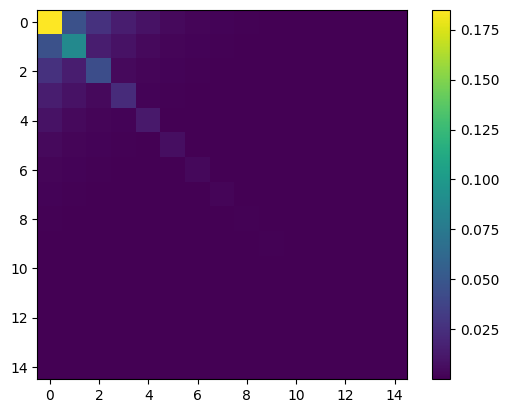

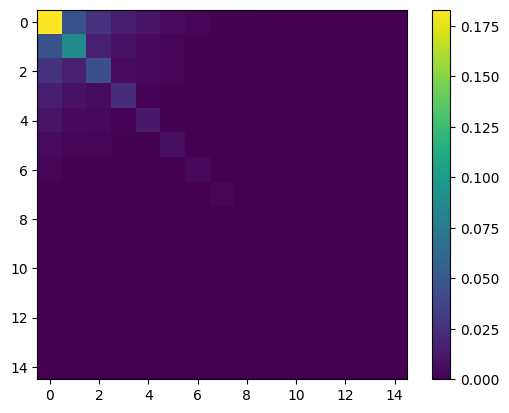

In [10]:
plt.figure()
plt.imshow(Cov_SN)
plt.colorbar()

plt.figure()
plt.imshow(SN_cov_est)
plt.colorbar()

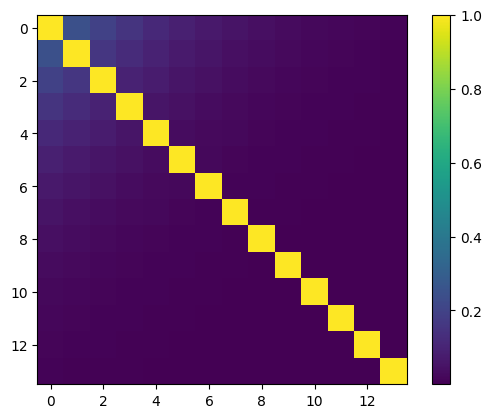

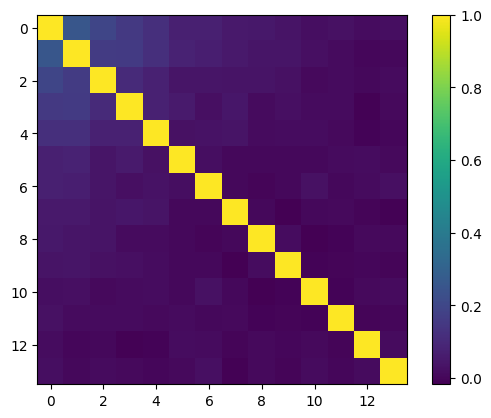

In [11]:
plt.figure()
plt.imshow(corr_ana[1:,1:])
plt.colorbar()

plt.figure()
plt.imshow(corr_est[1:,1:])
plt.colorbar()

In [28]:
print(Cov_SN)

[[ 5.04046245e+03  2.88523002e+03  1.66027658e+03  9.55389452e+02  5.49769247e+02  3.16359181e+02  1.82045707e+02  1.04756370e+02  6.02809992e+01  3.44783100e+01  1.99609149e+01  1.14863076e+01  6.60968012e+00  3.80347392e+00
   2.18867079e+00  1.25944858e+00  7.24737014e-01  4.17042622e-01  2.39982980e-01  1.38095791e-01  7.94658334e-02  4.57278142e-02  2.63136105e-02  1.51419024e-02  8.71325536e-03]
 [ 2.88523002e+03  1.67552996e+03  9.55389452e+02  5.49769247e+02  3.16359181e+02  1.82045707e+02  1.04756370e+02  6.02809992e+01  3.46880944e+01  1.97511305e+01  1.14863076e+01  6.60968012e+00  3.80347392e+00  2.18867079e+00
   1.25944858e+00  7.24737014e-01  4.17042622e-01  2.39982980e-01  1.38095791e-01  7.94658334e-02  4.57278142e-02  2.63136105e-02  1.51419024e-02  8.71325536e-03  5.01395512e-03]
 [ 1.66027658e+03  9.55389452e+02  5.58546648e+02  3.16359181e+02  1.82045707e+02  1.04756370e+02  6.02809992e+01  3.46880944e+01  1.99609149e+01  1.12765232e+01  6.60968012e+00  3.80347392e

In [29]:
print(cov)

[[ 4.89084950e+05  2.78588624e+05  1.67515863e+05  9.21433277e+04  5.45148991e+04  3.08393589e+04  1.80983519e+04  9.94819312e+03  5.75040593e+03  3.24541377e+03  1.64499479e+03  6.15704066e+02  3.11711487e+02  3.73855475e+01
  -6.30810325e+01 -1.25507293e+02 -2.42018138e+02 -2.74622394e+02 -2.83870824e+02 -3.00655266e+02 -3.32104950e+02 -3.33450607e+02 -3.06340174e+02 -3.31210802e+02 -3.23222643e+02]
 [ 2.78588624e+05  1.60759544e+05  9.57241762e+04  5.26878479e+04  3.10983727e+04  1.77026623e+04  1.02752295e+04  5.74452162e+03  3.29817390e+03  1.85445872e+03  9.37098893e+02  3.28615814e+02  1.57544875e+02  1.79912387e+00
  -5.55002228e+01 -9.71596145e+01 -1.55579241e+02 -1.76379502e+02 -1.80571777e+02 -1.94359834e+02 -2.08247126e+02 -2.11231924e+02 -1.95141364e+02 -2.08667467e+02 -2.04251695e+02]
 [ 1.67515863e+05  9.57241762e+04  5.87318041e+04  3.17428053e+04  1.87592880e+04  1.05719588e+04  6.18278382e+03  3.47148309e+03  1.95126188e+03  1.15833266e+03  5.77604570e+02  2.40765239e